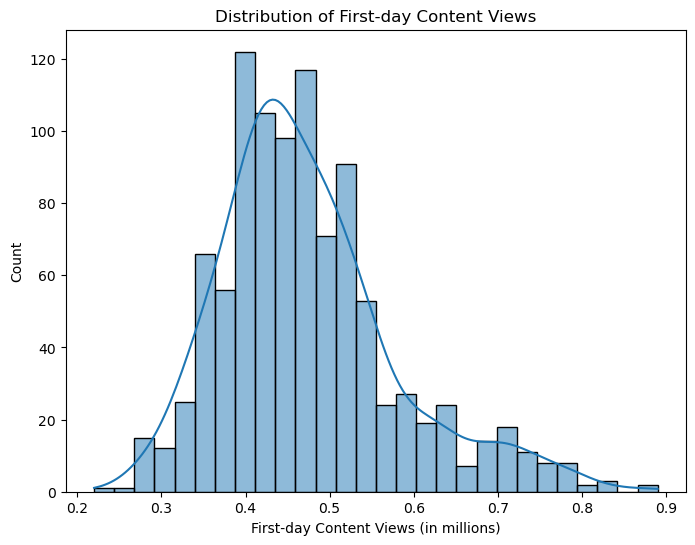

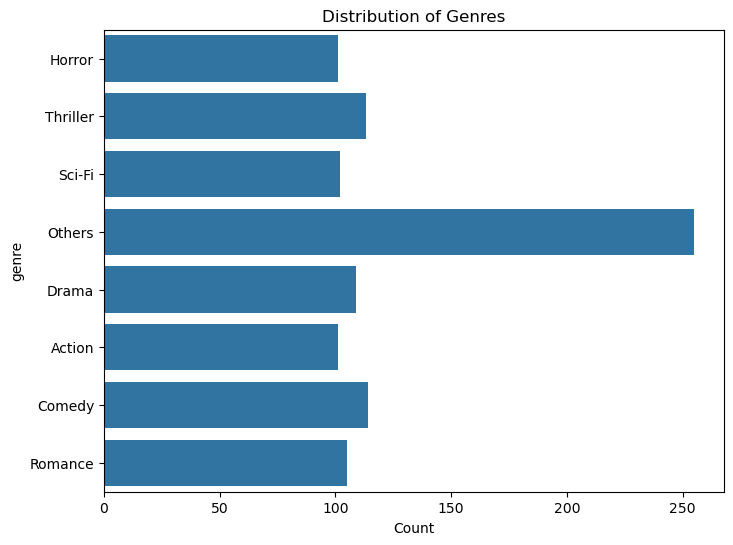

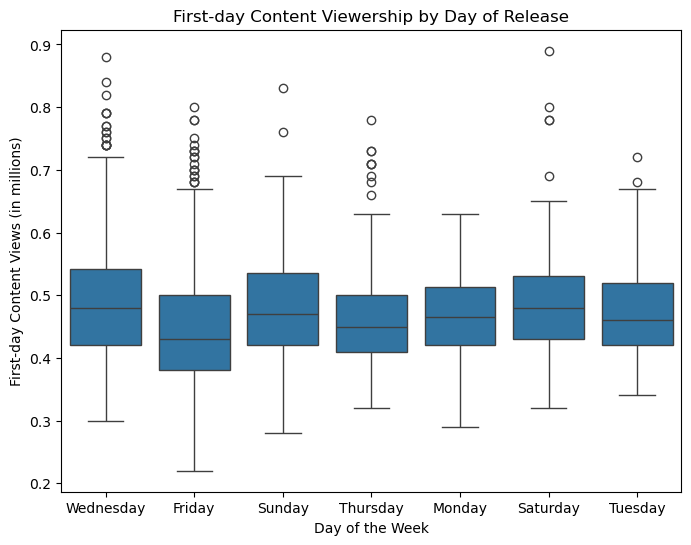

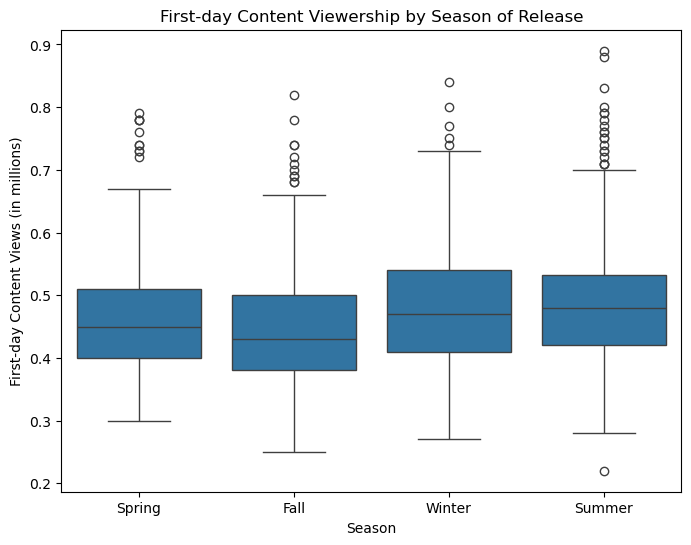

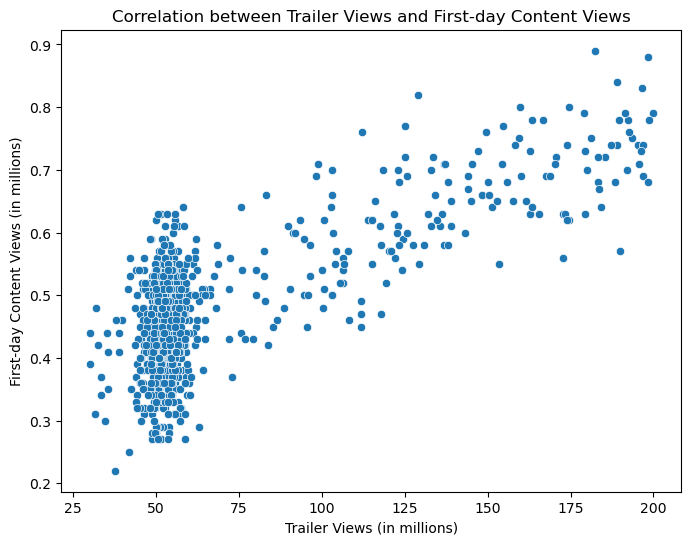

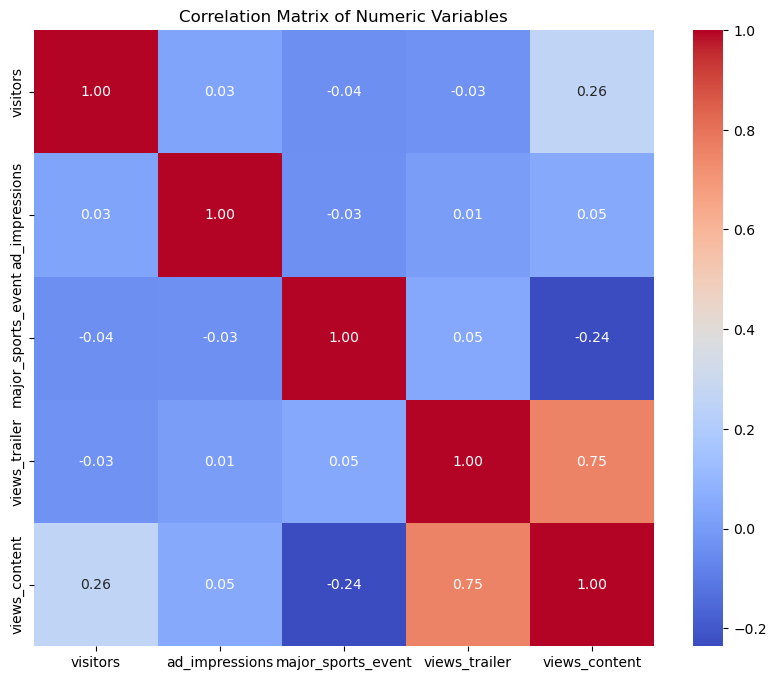

Missing values:
visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64
Duplicate rows: 0
Number of outliers in views_content: 47
Model Coefficients:
                      Coefficient
visitors                0.128909
ad_impressions          0.000008
major_sports_event     -0.059559
views_trailer           0.002311
genre_Comedy            0.004389
genre_Drama             0.010636
genre_Horror            0.009434
genre_Others            0.004984
genre_Romance          -0.001385
genre_Sci-Fi            0.010008
genre_Thriller          0.011518
dayofweek_Monday        0.045065
dayofweek_Saturday      0.052561
dayofweek_Sunday        0.038818
dayofweek_Thursday      0.019637
dayofweek_Tuesday       0.032412
dayofweek_Wednesday     0.049532
season_Spring           0.023201
season_Summer           0.044605
season_Winter           0.026532


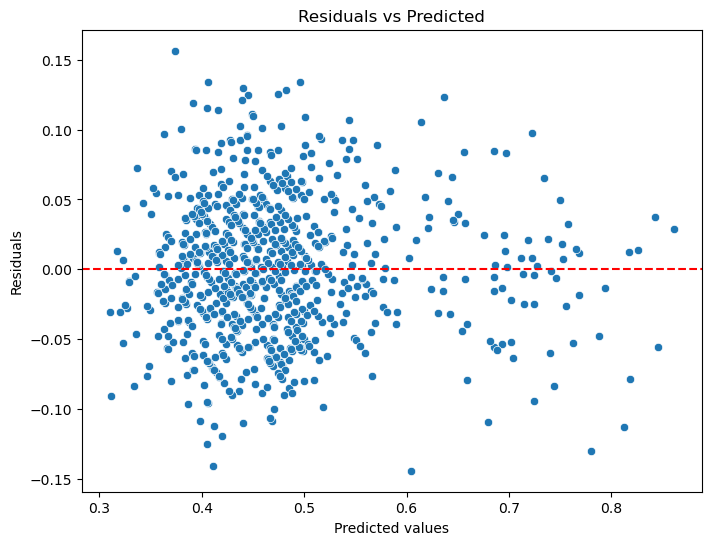

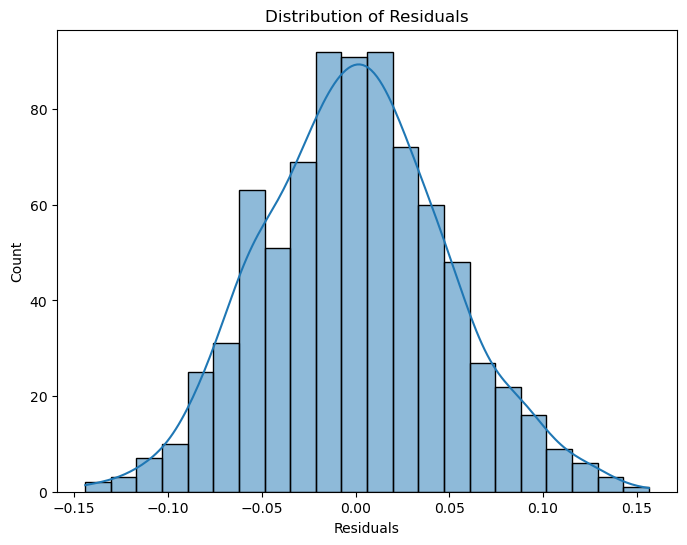

Missing values:
visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64
Missing values after handling:
 visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64
R-squared: 0.7743076305248305
RMSE: 0.05002787107182986

Significant Predictors (sorted by importance):
                      Coefficient  Absolute Coefficient
visitors                0.128909              0.128909
major_sports_event     -0.059559              0.059559
dayofweek_Saturday      0.052561              0.052561
dayofweek_Wednesday     0.049532              0.049532
dayofweek_Monday        0.045065              0.045065


In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
file_path = 'C:/Users/ARPIT SING/Documents/ottdata (1).csv'
data = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)

# 1. Distribution of content views
plt.figure(figsize=(8,6))
sns.histplot(data['views_content'], kde=True)
plt.title('Distribution of First-day Content Views')
plt.xlabel('First-day Content Views (in millions)')
plt.show()

# 2. Distribution of genres
plt.figure(figsize=(8,6))
sns.countplot(y=data['genre'])
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.show()

# 3. Viewership vs. Day of release
plt.figure(figsize=(8,6))
sns.boxplot(x=data['dayofweek'], y=data['views_content'])
plt.title('First-day Content Viewership by Day of Release')
plt.xlabel('Day of the Week')
plt.ylabel('First-day Content Views (in millions)')
plt.show()

# 4. Viewership vs. Season of release
plt.figure(figsize=(8,6))
sns.boxplot(x=data['season'], y=data['views_content'])
plt.title('First-day Content Viewership by Season of Release')
plt.xlabel('Season')
plt.ylabel('First-day Content Views (in millions)')
plt.show()

# 5. Correlation between trailer views and content views
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['views_trailer'], y=data['views_content'])
plt.title('Correlation between Trailer Views and First-day Content Views')
plt.xlabel('Trailer Views (in millions)')
plt.ylabel('First-day Content Views (in millions)')
plt.show()

# 6. Correlation heatmap of all variables
# Selecting only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# 6. Correlation heatmap of all numeric variables
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


# Data Preprocessing

# Checking for missing values
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Checking for duplicate values
duplicates = data.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Outlier detection using IQR method for 'views_content'
Q1 = data['views_content'].quantile(0.25)
Q3 = data['views_content'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data['views_content'] < (Q1 - 1.5 * IQR)) | (data['views_content'] > (Q3 + 1.5 * IQR))).sum()
print(f"Number of outliers in views_content: {outliers}")

# Converting categorical variables to numerical (One-Hot Encoding)
data_encoded = pd.get_dummies(data, columns=['genre', 'dayofweek', 'season'], drop_first=True)

# Model Building - Linear Regression

# Defining features (X) and target (y)
X = data_encoded.drop(columns='views_content')
y = data_encoded['views_content']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model coefficients
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print("Model Coefficients:\n", coefficients)

# Testing the assumptions of linear regression
# 1. Linearity - plotting residuals
y_pred_train = lr_model.predict(X_train)
residuals = y_train - y_pred_train

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_train, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# 2. Normality of residuals
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()


print(f"Missing values:\n{data.isnull().sum()}")

# Fill missing values for numeric columns with their mean
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Handle categorical columns (if needed, fill with mode or another strategy)
categorical_cols = ['genre', 'dayofweek', 'season']  
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

print("Missing values after handling:\n", data.isnull().sum())

# Model Evaluation
y_pred = lr_model.predict(X_test)

# R-squared and RMSE
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r_squared}")
print(f"RMSE: {rmse}")

# Actionable Insights and Recommendations
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print("\nSignificant Predictors (sorted by importance):\n", coefficients.head())
